In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
data = pd.read_csv('maladie_cardiaque.csv', usecols=lambda column: column != 'Unnamed: 0',index_col = 'id')

In [43]:
data['cholesterol'] = data["cholesterol"].map({'normal': 1, 'eleve': 2, 'tres eleve':3})

In [29]:
data["age"] = round(data["age"]/365.25,2)

In [31]:
data.sample(3)

,age,genre,taille,Poids,pression_systo,pression_diasto,cholesterol,glycemie,fumeur,conso_alco,activite_physique,malade
id,,,,,,,,,,,,
70722,50.28,femme,156,70.0,110,70,1,1,non fumeur,non,1,non
63592,53.68,femme,158,57.0,120,80,1,1,non fumeur,non,0,non
59061,58.48,homme,170,86.0,120,80,1,1,non fumeur,non,1,oui


In [32]:
data.columns

Index(['age', 'genre', 'taille', 'Poids', 'pression_systo', 'pression_diasto',
       'cholesterol', 'glycemie', 'fumeur', 'conso_alco', 'activite_physique',
       'malade'],
      dtype='object')

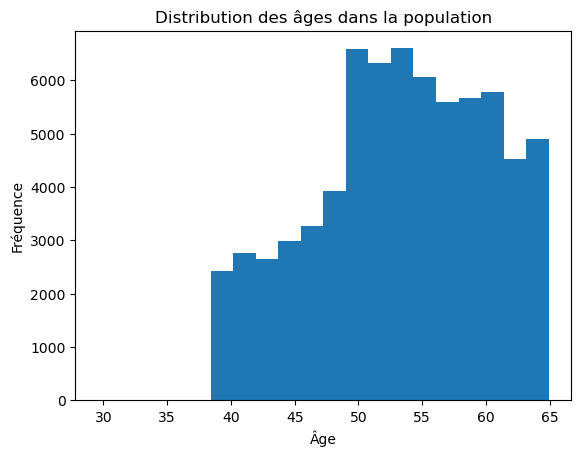

In [13]:
plt.hist(data['age'], bins=20)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution des âges dans la population')
plt.show()


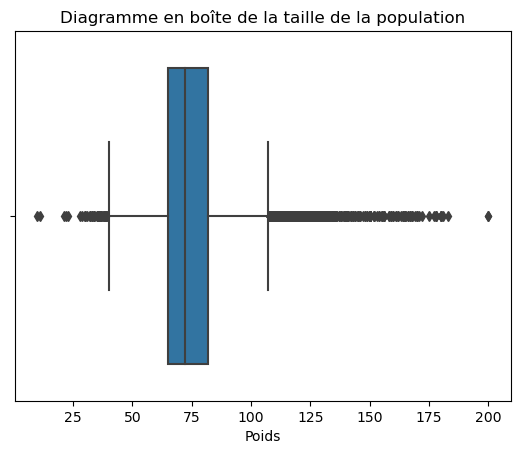

In [16]:
sns.boxplot(x=data['Poids'])
plt.xlabel('Poids')
plt.title('Diagramme en boîte de la taille de la population')
plt.show()

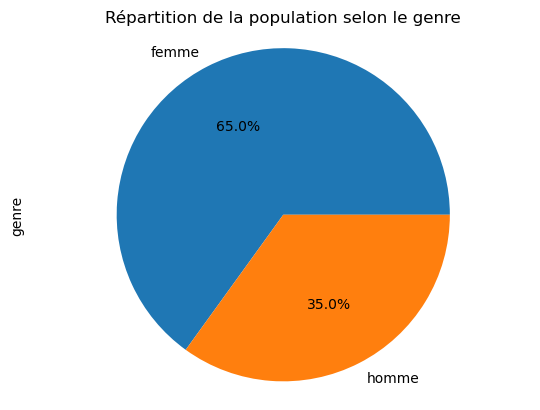

In [17]:
data['genre'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Répartition de la population selon le genre')
plt.show()

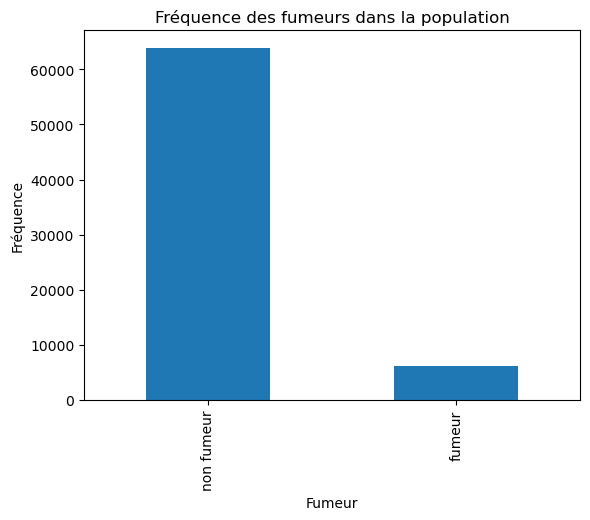

In [18]:
data['fumeur'].value_counts().plot(kind='bar')
plt.xlabel('Fumeur')
plt.ylabel('Fréquence')
plt.title('Fréquence des fumeurs dans la population')
plt.show()

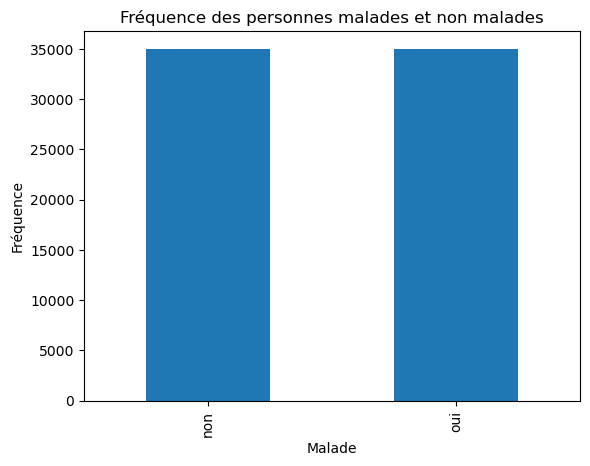

In [19]:
data['malade'].value_counts().plot(kind='bar')
plt.xlabel('Malade')
plt.ylabel('Fréquence')
plt.title('Fréquence des personnes malades et non malades')
plt.show()

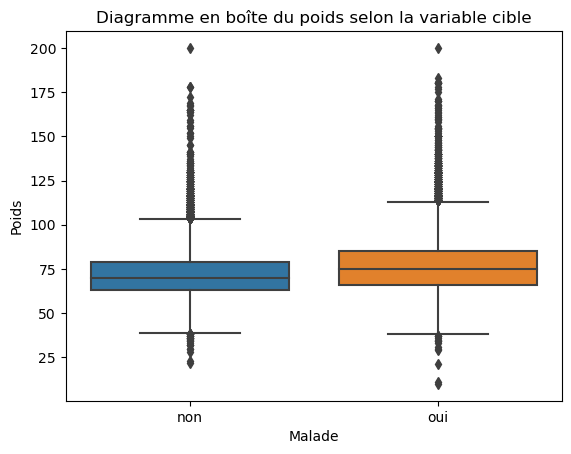

In [22]:
sns.boxplot(x='malade', y='Poids', data=data)
plt.xlabel('Malade')
plt.ylabel('Poids')
plt.title('Diagramme en boîte du poids selon la variable cible')
plt.show()

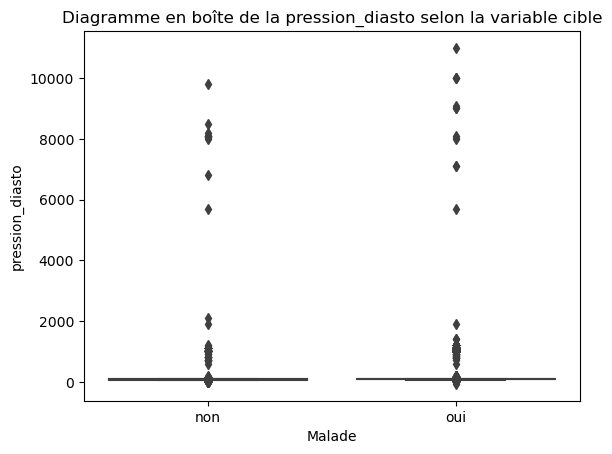

In [23]:
sns.boxplot(x='malade', y='pression_diasto', data=data)
plt.xlabel('Malade')
plt.ylabel('pression_diasto')
plt.title('Diagramme en boîte de la pression_diasto selon la variable cible')
plt.show()

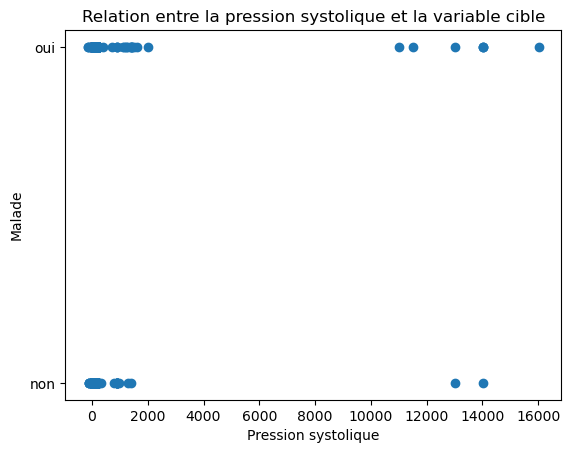

In [24]:
plt.scatter(data['pression_systo'], data['malade'])
plt.xlabel('Pression systolique')
plt.ylabel('Malade')
plt.title('Relation entre la pression systolique et la variable cible')
plt.show()


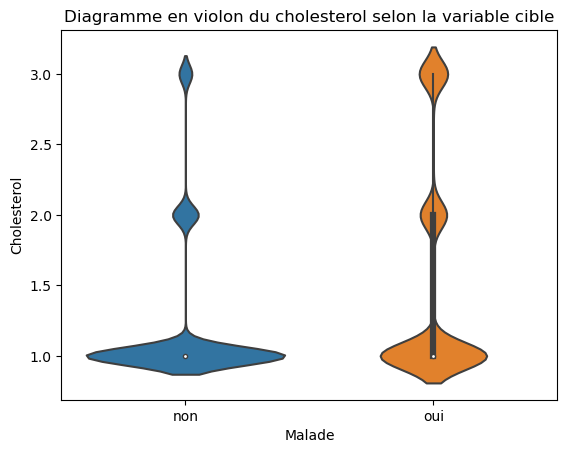

In [33]:
sns.violinplot(x='malade', y='cholesterol', data=data)
plt.xlabel('Malade')
plt.ylabel('Cholesterol')
plt.title('Diagramme en violon du cholesterol selon la variable cible')
plt.show()

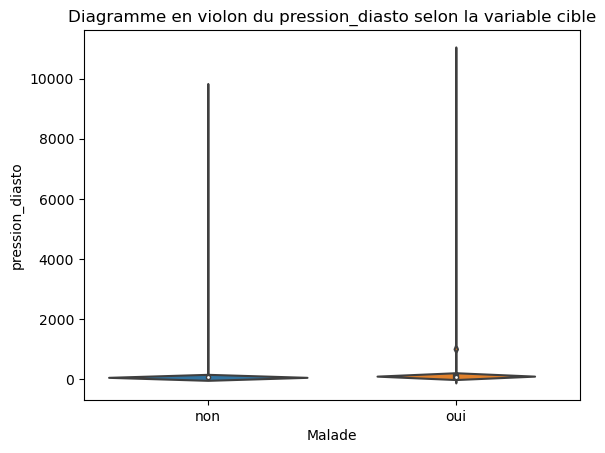

In [34]:
sns.violinplot(x='malade', y='pression_diasto', data=data)
plt.xlabel('Malade')
plt.ylabel('pression_diasto')
plt.title('Diagramme en violon du pression_diasto selon la variable cible')
plt.show()

In [82]:
def stacked_barplot(data, target_col, cat_cols):
    """
    Crée un diagramme en barres empilées pour chaque variable catégorielle dans le dataframe 'data' 
    en montrant les proportions de patients malades et non malades pour chaque catégorie.
    """
    # Calculer le nombre total de patients malades et non malades
    num_patients = len(data)
    num_malades = len(data[data[target_col] == 'oui'])
    num_non_malades = num_patients - num_malades
    
    # Parcourir les variables catégorielles et créer un subplot pour chaque variable
    num_cols = len(cat_cols)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12,8))
    plt.subplots_adjust(hspace=0.4)
    axes = axes.ravel()[:num_cols]
    
    for i, col in enumerate(cat_cols):
        # Calculer le nombre de patients malades et non malades pour chaque catégorie de la variable
        categories = data[col].unique()
        malades_counts = [len(data[(data[col] == cat) & (data[target_col] == 'oui')]) for cat in categories]
        non_malades_counts = [len(data[(data[col] == cat) & (data[target_col] == 'non')]) for cat in categories]
        
        # Normaliser les comptes pour obtenir des proportions
        malades_prop = [count/num_patients for count in malades_counts]
        non_malades_prop = [count/num_patients for count in non_malades_counts]

        
        # Tracer le diagramme en barres empilées
        axes[i].bar(categories, non_malades_prop, color='green', label='Non malade')
        axes[i].bar(categories, malades_prop, bottom=non_malades_prop, color='red', label='Malade')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Proportion')
        axes[i].legend()
        
    # Ajouter un titre à la figure
    fig.suptitle('Proportions de patients malades et non malades pour chaque variable catégorielle')
    
    # Afficher la figure
    plt.show()


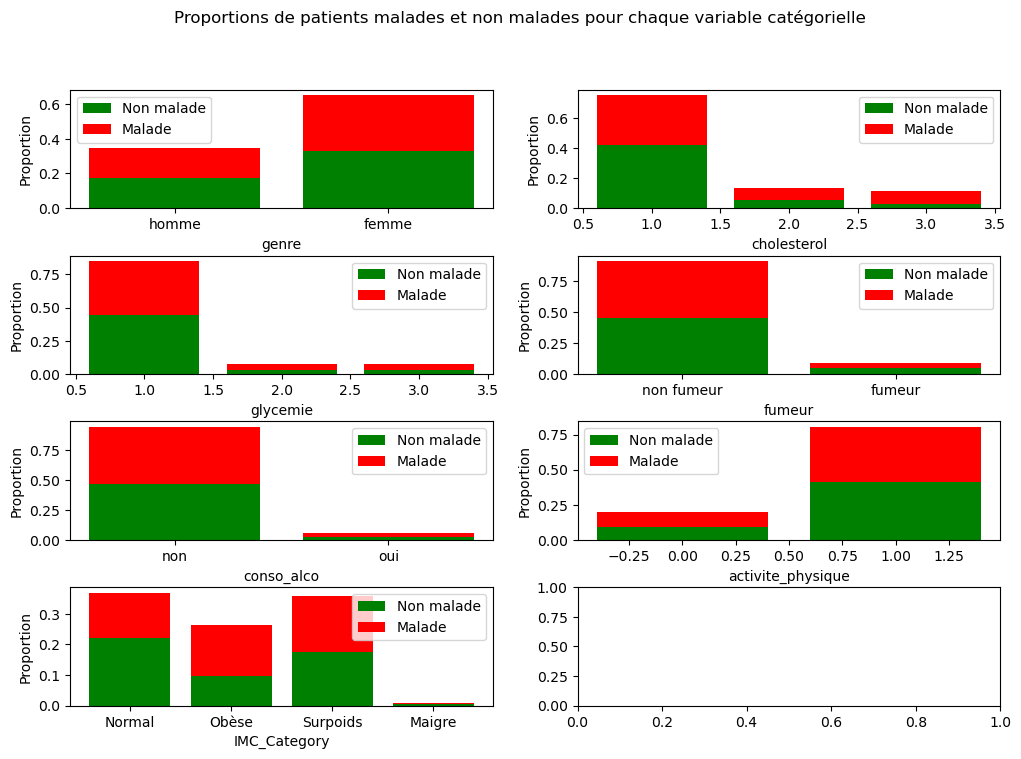

In [88]:
stacked_barplot(data, 'malade', ['genre', 'cholesterol', 'glycemie', 'fumeur', 'conso_alco', 'activite_physique', 'IMC_Category'])


In [86]:
def imc_category(row):
    taille_m = row['taille'] / 100  # Convertir la taille en mètres
    imc = row['Poids'] / (taille_m ** 2)  # Calculer l'IMC
    if imc < 18.5:
        return 'Maigre'
    elif imc < 25:
        return 'Normal'
    elif imc < 30:
        return 'Surpoids'
    else:
        return 'Obèse'
data['IMC'] = data.apply(lambda row: row['Poids'] / ((row['taille'] / 100) ** 2), axis=1)
data['IMC_Category'] = data.apply(imc_category, axis=1)

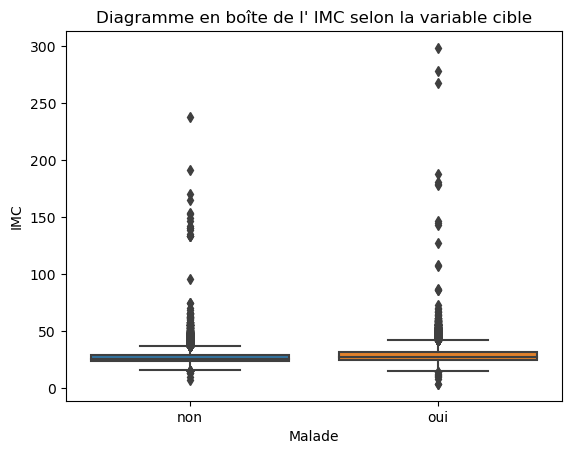

In [87]:
sns.boxplot(x='malade', y='IMC', data=data)
plt.xlabel('Malade')
plt.ylabel('IMC')
plt.title('Diagramme en boîte de l\' IMC selon la variable cible')
plt.show()